In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from bmcs_cross_section.api import AnaFRPBending

### b. 3D_surface visualization of the design space classified by different reinforcment ratios 

C:\Users\adelpasand\AppData\Local\Temp\ipykernel_8400\140383467.py:42: UserWarning: No contour levels were found within the data range.
  ax1.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
C:\Users\adelpasand\AppData\Local\Temp\ipykernel_8400\140383467.py:43: UserWarning: No contour levels were found within the data range.
  ax2.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
C:\Users\adelpasand\AppData\Local\Temp\ipykernel_8400\140383467.py:44: UserWarning: No contour levels were found within the data range.
  ax3.contour(x, y, z, levels=[target_z_value], colors=colors[index])


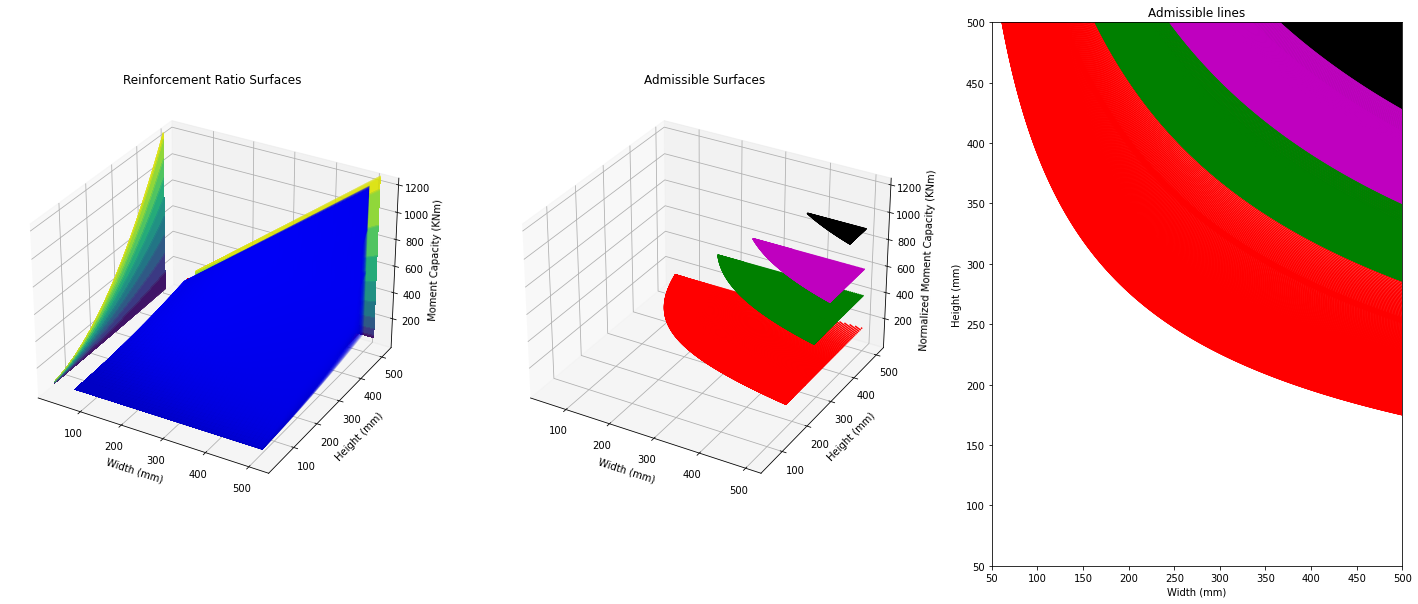

In [10]:




# Define ultimate moment capacity function 
def f(p, b, d):
    A_f = p * b * d / 100
    Mu = AnaFRPBending(A_f=A_f, f_cm = 50, E_f = 70000, f_fu = 900, b=b, d=d).M_u
    return Mu

# Generate input values
p_range = np.linspace(0.1, 2, 500)   # rainforcement ratio (Percent)
b_range = np.linspace(50, 500, 100)  # Width (mm)
d_range = np.linspace(50, 500, 100)  # Depth (mm)
x, y = np.meshgrid(b_range, d_range)

fig = plt.figure(figsize=(25, 10))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133)
ax1.set_xlabel('Width (mm)')
ax1.set_ylabel('Depth (mm)')
ax1.set_zlabel('Moment Capacity (KNm)')
ax1.set_title('Reinforcement Ratio Surfaces')
ax2.set_xlabel('Width (mm)')
ax2.set_ylabel('Depth (mm)')
ax2.set_zlabel('Normalized Moment Capacity (KNm)')
ax2.set_title('Admissible Surfaces')
ax3.set_xlabel('Width (mm)')
ax3.set_ylabel('Depth (mm)')
ax3.set_title('Admissible lines')

step_to_plot = 1
target_Mu = [150, 400, 600, 900]
colors = ['r', 'g', 'm', 'k']

for i, p in enumerate(p_range[::step_to_plot]):
    z = np.array([[f(p, b, d) for b in b_range] for d in d_range])
    ax1.plot_surface(x, y, z, color='b', alpha=0.1)
    cmap = plt.cm.get_cmap('viridis', len(p_range[::step_to_plot]))
    # ax2.contourf(x, y, z, zdir='z', offset=0, cmap=cmap)
    ax1.contourf(x, y, z, zdir='x', offset=0, cmap=cmap , alpha=0.1)
    ax1.contourf(x, y, z, zdir='y', offset=550, cmap=cmap, alpha=0.1)
    for index, target_z_value in enumerate(target_Mu):
        # ax1.plot_surface(x, y, z, color=colors[i], alpha=0.6)
        ax1.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
        ax2.contour3D(x, y, z, levels=[target_z_value], colors=colors[index])
        ax3.contour(x, y, z, levels=[target_z_value], colors=colors[index])
        
plt.show()
